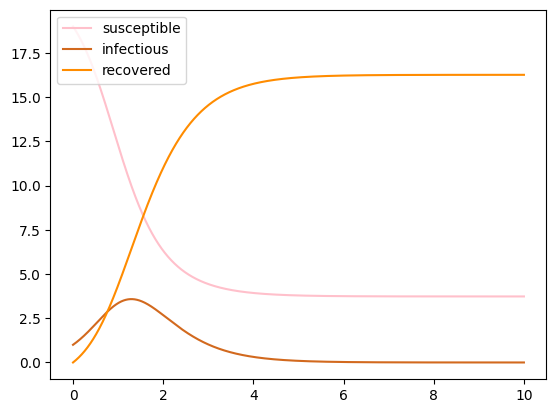

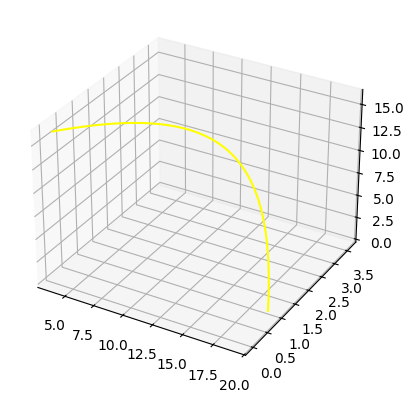

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math
import random

""""
a = N
b = p
c = k
d = D

x = S
y = I
z = R
"""

datasize = 10000
neg_steps = datasize

def func_x(x, y, z, a, b, c, d):
    return -b*c*x*y/a

def func_y(x, y, z, a, b, c, d):
    return b*c*x*y/a - y/d

def func_z(x, y, z, a, b, c, d):
    return y/d

def Euler_approx_3d(datasize, dt, seeds, F_x, F_y, F_z, a, b, c, d, neg_steps):
    final_S_list = []
    final_I_list = []
    final_R_list = []
    for seed_x, seed_y, seed_z in [[seeds[x][y] for x in range(len(seeds))] for y in range(len(seeds[0]))]:
        I_list = [seed_y]+[0]*(datasize-1)
        S_list = [seed_x]+[0]*(datasize-1)
        R_list = [seed_z]+[0]*(datasize-1)
        for i in range(datasize-1):
            S_list[i + 1] = S_list[i] + F_x(S_list[i], I_list[i], R_list[i], a, b, c, d)*dt
            I_list[i + 1] = I_list[i] + F_y(S_list[i], I_list[i], R_list[i], a, b, c, d)*dt
            R_list[i + 1] = R_list[i] + F_z(S_list[i], I_list[i], R_list[i], a, b, c, d)*dt
        final_S_list.append(S_list[-neg_steps:])
        final_I_list.append(I_list[-neg_steps:])
        final_R_list.append(R_list[-neg_steps:])
    return final_S_list, final_I_list, final_R_list


final_S_list, final_I_list, final_R_list = Euler_approx_3d(datasize, 0.01, [[19], [1], [0]], func_x, func_y, func_z, 20, 0.1, 4, 5, neg_steps) #Calling the function with a seed, and parameters being N = 20, p = 0.1, k = 4, D = 5
colors = ['black','gray','pink','chocolate','darkorange','yellow','lawngreen','springgreen','teal','deepskyblue','navy','indigo','deeppink','crimson']

# Plot x values over time
ind = 2
for S_list in final_S_list:
    plt.plot([0.001 * i for i in range(neg_steps)], S_list, color = colors[ind%len(colors)], label = 'susceptible')
    ind += 1
#ind = 0

# Plot y values over time
for I_list in final_I_list:
    plt.plot([0.001 * i for i in range(neg_steps)], I_list, color = colors[ind%len(colors)], label = 'infectious')
    ind += 1
#ind = 0

#plot z values over time
for R_list in final_R_list:
    plt.plot([0.001 * i for i in range(neg_steps)], R_list, color = colors[ind%len(colors)], label = 'recovered')
    ind += 1
#ind = 0
plt.legend(loc = 'upper left')
plt.show()


#plot phase space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for S_list, I_list, R_list in zip(final_S_list, final_I_list, final_R_list):
    ax.plot(S_list, I_list, R_list, color = colors[ind%len(colors)])
    ind += 1
plt.show()

{0: 'Susceptible', 1: 'Susceptible', 2: 'Susceptible', 3: 'Susceptible', 4: 'Susceptible', 5: 'Susceptible', 6: 'Susceptible', 7: 'Susceptible', 8: 'Susceptible', 9: 'Susceptible', 10: 'Susceptible', 11: 'Susceptible', 12: 'Susceptible', 13: 'Susceptible', 14: 'Susceptible', 15: 'Susceptible', 16: 'Susceptible', 17: 'Susceptible', 18: 'Susceptible', 19: 'Susceptible', 20: 'Susceptible', 21: 'Susceptible', 22: 'Susceptible', 23: 'Susceptible', 24: 'Susceptible', 25: 'Susceptible', 26: 'Susceptible', 27: 'Susceptible', 28: 'Susceptible', 29: 'Susceptible', 30: 'Susceptible', 31: 'Susceptible', 32: 'Susceptible', 33: 'Susceptible', 34: 'Susceptible', 35: 'Susceptible', 36: 'Susceptible', 37: 'Susceptible', 38: 'Susceptible', 39: 'Susceptible', 40: 'Susceptible', 41: 'Susceptible', 42: 'Susceptible', 43: 'Susceptible', 44: 'Susceptible', 45: 'Susceptible', 46: 'Susceptible', 47: 'Susceptible', 48: 'Susceptible', 49: 'Susceptible', 50: 'Susceptible', 51: 'Susceptible', 52: 'Susceptible', 53

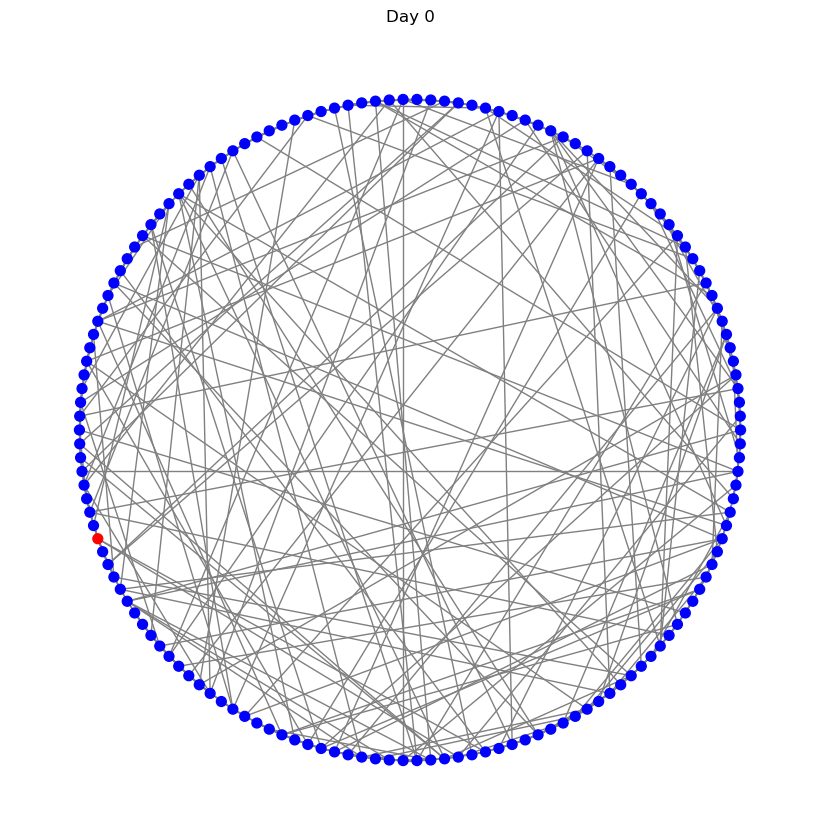

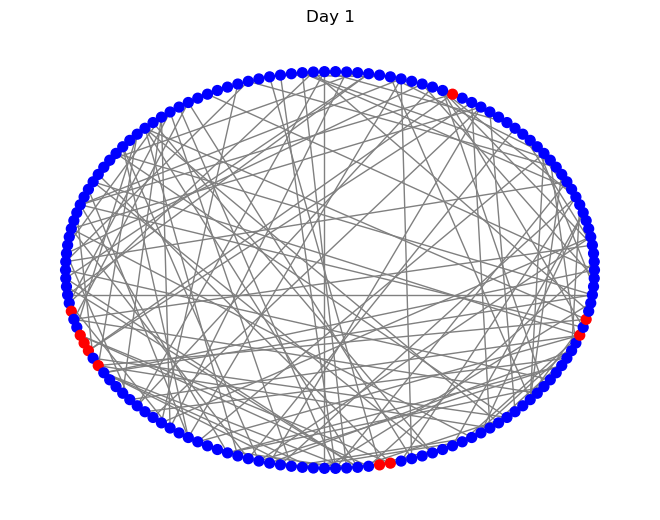

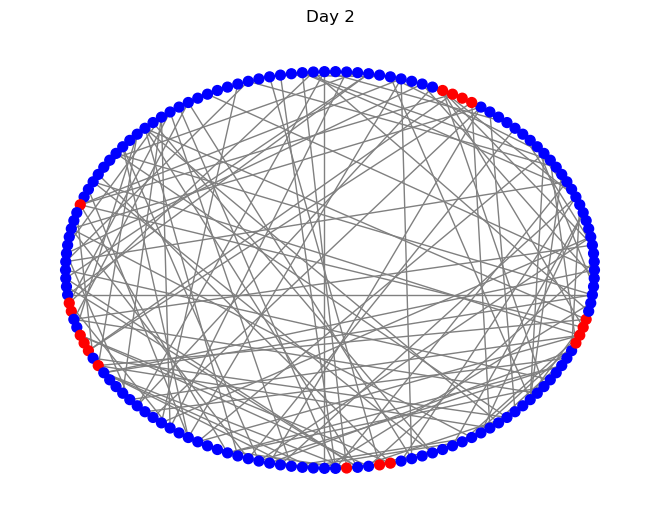

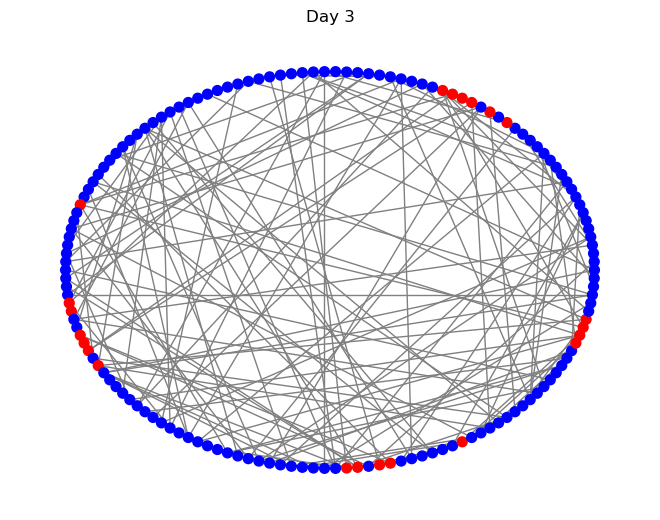

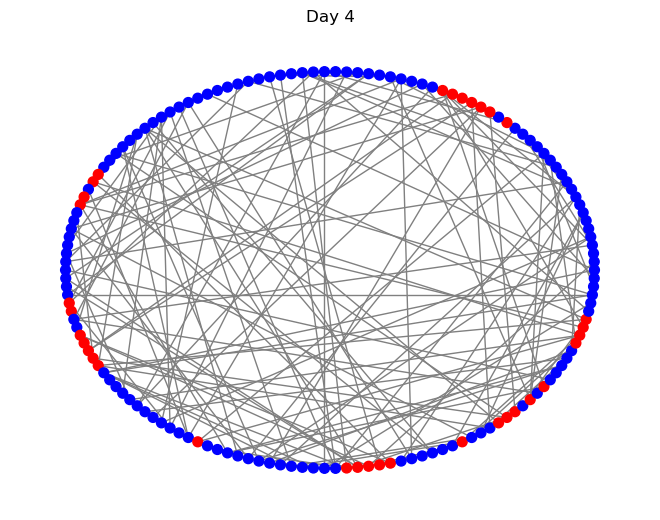

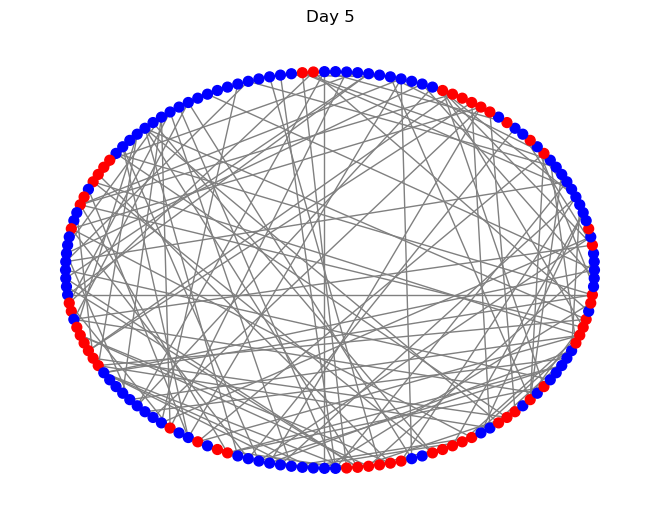

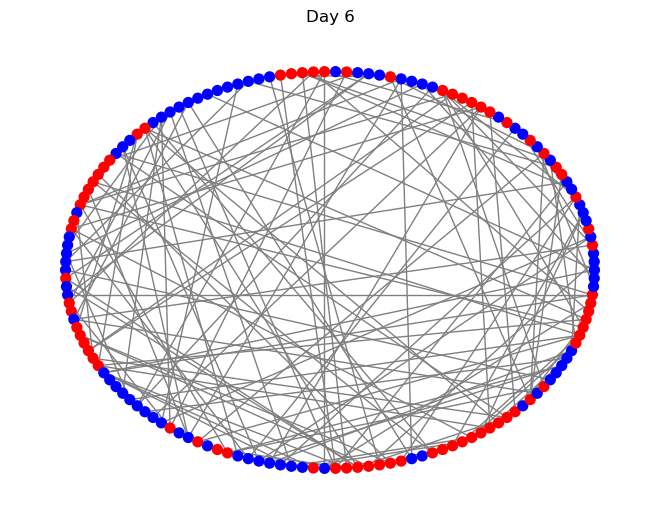

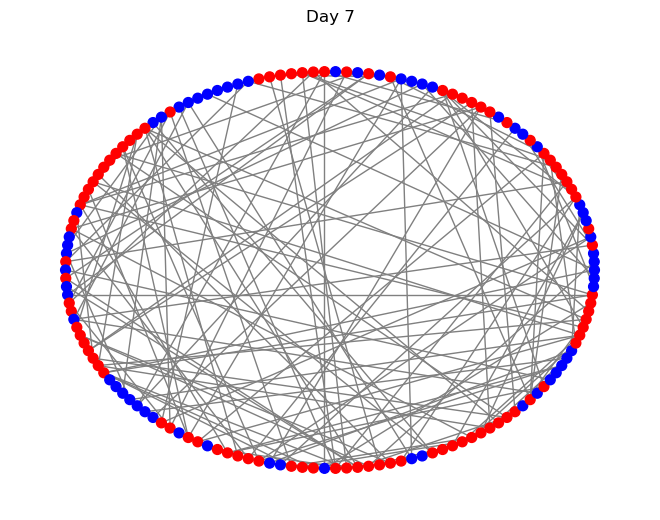

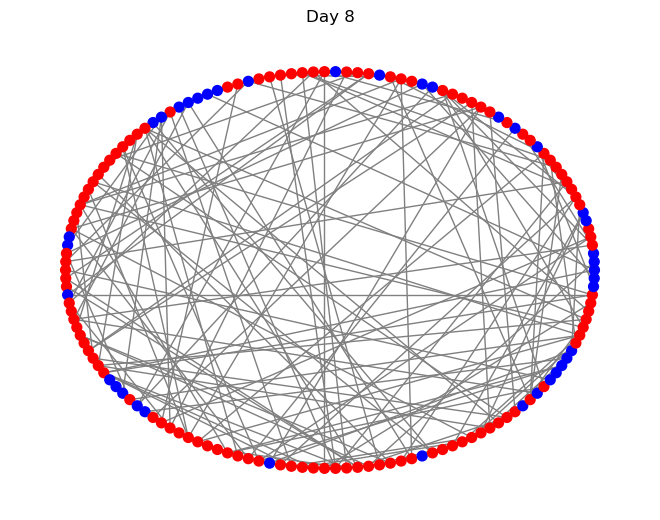

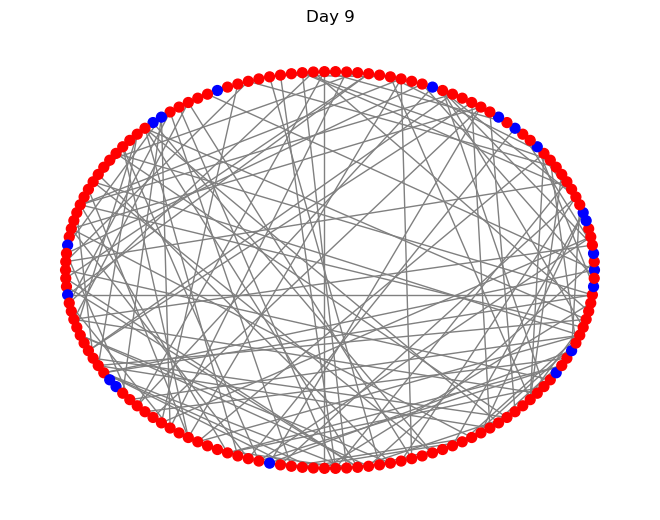

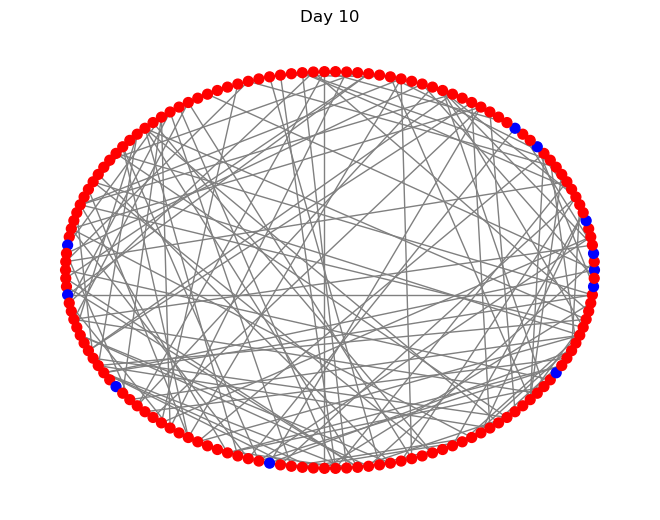

In [23]:
import matplotlib.pyplot as plt
import random
import networkx as nx
import time

Rewiring_Prob = 0.3
Nodes = 150
Nearest_Neighbors = 6


simulation_time = 200
recovered_immunity_time = 10

plt.figure(figsize=(8, 8))
graph = nx.watts_strogatz_graph(Nodes, Nearest_Neighbors, Rewiring_Prob)

#make a dictionary of the graph
network_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}

# Assign node attributes
patient_zero_ind = random.randint(0, Nodes)
nx.set_node_attributes(graph, {1: "Infected", 2: "Susceptible", 3: "Recovered"}, "status")
for node in graph.nodes():
    graph.nodes[node]["status"] = "Susceptible"
graph.nodes[patient_zero_ind]['status'] = 'Infected'

# Extract attributes into a dictionary
node_status_dict = nx.get_node_attributes(graph, "status")

print(node_status_dict)
# Output: {1: 'Infected', 2: 'Susceptible', 3: 'Recovered'}

# Assign random edge strengths (weights) between 0.1 and 1.0
for u, v in graph.edges():
    graph[u][v]['weight'] = round(random.uniform(0.01, 1.0), 2)

# Convert to a dictionary with edge strengths
edge_strengths = {(u, v): graph[u][v]['weight'] for u, v in graph.edges()}

color_map = {
    "Susceptible": "blue",
    "Infected": "red",
    "Recovered": "green"
}

# Generate a list of node colors based on their status
node_colors = [color_map[graph.nodes[node]["status"]] for node in graph.nodes]

print(edge_strengths)

print(network_dict)
pos = nx.circular_layout(graph)
nx.draw(graph, pos, with_labels=False, node_color=node_colors, edge_color="gray", node_size=50)
plt.title("Day 0")
plt.show()
infection_coefficient = 0.3
for t in range(10): #simulation time
    for node in graph.nodes(): #all nodes
        if graph.nodes[node]["status"] == 'Infected': #check infected
            for neighbor in list(graph.neighbors(node)): #infect
                infect_chance = random.random()
                if infection_coefficient * graph[neighbor][node]['weight'] >= infect_chance:
                    graph.nodes[neighbor]['status'] = 'Infected'
    node_colors = [color_map[graph.nodes[node]["status"]] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=False, node_color=node_colors, edge_color="gray", node_size=50)
    plt.title("Day " + str(t+1))
    plt.show()